# Problem 3 

### In this notebook I would like to highlight my visualization, machine learning, and data analysis skills as well as my work with artifical neural networks.

### The goal of this problem was to use neural networks to predict a value in a california housing data set

## Part a

In [ ]:
#pip install tensorflow

In [16]:
#pip install plot-ann

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install ann_visualizer

In [1]:
#pip install graphviz

In [2]:
#pip install keras

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import scale

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import Dense

In [9]:
def reset_weights(model):
	"""This function re-initializes model weights at each compile"""
	for layer in model.layers: 
		if isinstance(layer, tf.keras.Model):
			reset_weights(layer)
			continue
	for k, initializer in layer.__dict__.items():
		if "initializer" not in k:
			continue
		# find the corresponding variable
		var = getattr(layer, k.replace("_initializer", ""))
		var.assign(initializer(var.shape, var.dtype))


In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y =datasets.fetch_california_housing(return_X_y=True, as_frame=True)
X = scale(X)

In [6]:
X

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [14]:
model = Sequential()

model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [15]:
# Compile model
reset_weights(model)
model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.SGD(0.001), metrics=['accuracy'])

In [16]:
# Fit the model
history = model.fit(X_train, y_train, batch_size = 64, validation_split = 0.25, epochs = 50)

Epoch 1/50
194/194 [==============================] - 1s 2ms/step - loss: 1.8612 - accuracy: 2.7065e-04 - val_loss: 1.3904 - val_accuracy: 0.0024
Epoch 2/50
194/194 [==============================] - 0s 929us/step - loss: 1.2935 - accuracy: 0.0031 - val_loss: 1.0160 - val_accuracy: 0.0027
Epoch 3/50
194/194 [==============================] - 0s 883us/step - loss: 0.9509 - accuracy: 0.0032 - val_loss: 0.8350 - val_accuracy: 0.0027
Epoch 4/50
194/194 [==============================] - 0s 851us/step - loss: 0.8062 - accuracy: 0.0029 - val_loss: 0.7378 - val_accuracy: 0.0027
Epoch 5/50
194/194 [==============================] - 0s 814us/step - loss: 0.7056 - accuracy: 0.0028 - val_loss: 0.6719 - val_accuracy: 0.0027
Epoch 6/50
194/194 [==============================] - 0s 807us/step - loss: 0.6621 - accuracy: 0.0032 - val_loss: 0.6279 - val_accuracy: 0.0027
Epoch 7/50
194/194 [==============================] - 0s 802us/step - loss: 0.6250 - accuracy: 0.0040 - val_loss: 0.5980 - val_accurac

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
scores = model.evaluate(X, y)

645/645 [==============================] - 1s 695us/step - loss: 0.4672 - accuracy: 0.0030


# (i)

In [20]:
from plot_ann import ann

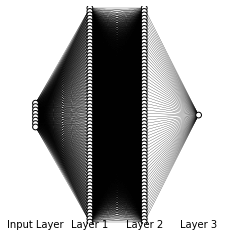

In [21]:
ax, *_ = ann([8, 64, 64, 1], layer_labels=True)
ax.set_aspect('equal')

# (ii)

In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

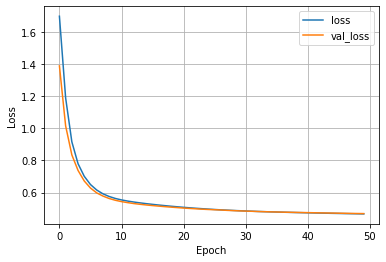

In [23]:
plot_loss(history)

### This graph might be helpful to prevent overfitting because it tells us when the model has been sufficiently trained. Once you see the line start to plateau, you know that you are not significantly reducing your validation loss by increasing epochs. 

# (iii)

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [25]:
y_pred = model.predict(X_test)

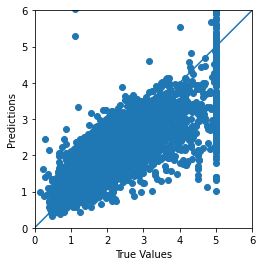

In [26]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [27]:
MSE = mean_squared_error(y_test, y_pred)
MSE


0.4976002701431343

## Part B

### Model 1

### My thought processes for Model 1 was to see if adding more neurons and an extra layer would lead to overfitting. As seen in the model below the ANN has an extra layer so I was interested to see how this would impact the final results.

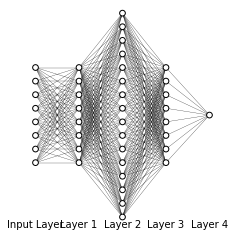

In [28]:
ax1, *_ = ann([8, 8, 16, 8, 1], layer_labels=True)
ax1.set_aspect('equal')

In [29]:
model1 = Sequential()

model1.add(Dense(8, input_dim=8, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1))

In [30]:
# Compile model
reset_weights(model1)
model1.compile(loss='mean_absolute_error', optimizer=keras.optimizers.SGD(0.001))

In [31]:
history1 = model1.fit(X_train, y_train, batch_size = 64, validation_split = 0.25, epochs = 50)

Epoch 1/50
194/194 [==============================] - 0s 1ms/step - loss: 1.9199 - val_loss: 1.5397
Epoch 2/50
194/194 [==============================] - 0s 832us/step - loss: 1.4634 - val_loss: 1.2142
Epoch 3/50
194/194 [==============================] - 0s 1ms/step - loss: 1.1919 - val_loss: 1.0708
Epoch 4/50
194/194 [==============================] - 0s 962us/step - loss: 1.0552 - val_loss: 0.9918
Epoch 5/50
194/194 [==============================] - 0s 761us/step - loss: 0.9901 - val_loss: 0.9359
Epoch 6/50
194/194 [==============================] - 0s 829us/step - loss: 0.9325 - val_loss: 0.8885
Epoch 7/50
194/194 [==============================] - 0s 796us/step - loss: 0.8811 - val_loss: 0.8456
Epoch 8/50
194/194 [==============================] - 0s 823us/step - loss: 0.8501 - val_loss: 0.8075
Epoch 9/50
194/194 [==============================] - 0s 845us/step - loss: 0.8033 - val_loss: 0.7750
Epoch 10/50
194/194 [==============================] - 0s 828us/step - loss: 0.7826 - 

In [32]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


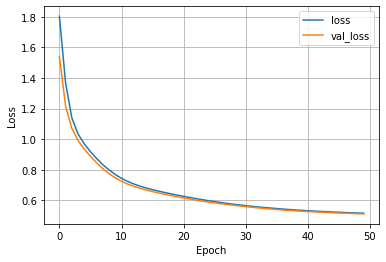

In [33]:
plot_loss(history1)

In [34]:
y_pred1 = model1.predict(X_test)

### Model 2

### My reasoning for Model 2 was to see if having less complex layers with fewer neurons and fewer layers would potentially lead to underfitting

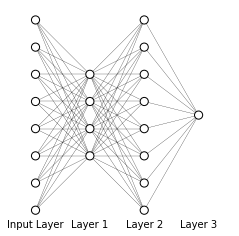

In [35]:
ax2, *_ = ann([8, 4, 8, 1], layer_labels=True)
ax2.set_aspect('equal')

In [36]:
model2 = Sequential()

model2.add(Dense(4, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1))

In [37]:
# Compile model
reset_weights(model2)
model2.compile(loss='mean_absolute_error', optimizer=keras.optimizers.SGD(0.001))

In [38]:
history2 = model2.fit(X_train, y_train, batch_size = 64, validation_split = 0.25, epochs = 50)

Epoch 1/50
194/194 [==============================] - 0s 1ms/step - loss: 1.9693 - val_loss: 1.6066
Epoch 2/50
194/194 [==============================] - 0s 927us/step - loss: 1.5430 - val_loss: 1.3046
Epoch 3/50
194/194 [==============================] - 0s 774us/step - loss: 1.2708 - val_loss: 1.1688
Epoch 4/50
194/194 [==============================] - 0s 771us/step - loss: 1.1660 - val_loss: 1.1047
Epoch 5/50
194/194 [==============================] - 0s 759us/step - loss: 1.0857 - val_loss: 1.0675
Epoch 6/50
194/194 [==============================] - 0s 709us/step - loss: 1.0445 - val_loss: 1.0388
Epoch 7/50
194/194 [==============================] - 0s 736us/step - loss: 1.0362 - val_loss: 1.0134
Epoch 8/50
194/194 [==============================] - 0s 679us/step - loss: 0.9985 - val_loss: 0.9895
Epoch 9/50
194/194 [==============================] - 0s 651us/step - loss: 0.9683 - val_loss: 0.9667
Epoch 10/50
194/194 [==============================] - 0s 642us/step - loss: 0.9672 

In [39]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


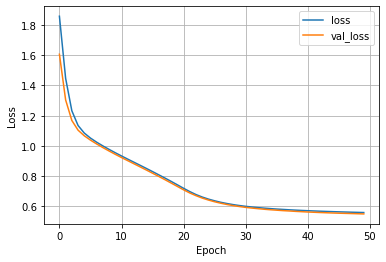

In [40]:
plot_loss(history2)

In [41]:
y_pred2 = model2.predict(X_test)

## Part C

In [42]:
perf = pd.DataFrame(columns=['MSE', 'MAE'],
                    index = ['Model', 'Model 1', 'Model 2'])
                             

perf.loc['Model', 'MSE'] = mean_squared_error(y_test, y_pred)
perf.loc['Model', 'MAE'] = mean_absolute_error(y_test, y_pred)

perf.loc['Model 1', 'MSE'] = mean_squared_error(y_test, y_pred1)
perf.loc['Model 1', 'MAE'] = mean_absolute_error(y_test, y_pred1)

perf.loc['Model 2', 'MSE'] = mean_squared_error(y_test, y_pred2)
perf.loc['Model 2', 'MAE'] = mean_absolute_error(y_test, y_pred2)

perf

,MSE,MAE
Model,0.4976,0.469235
Model 1,0.548701,0.51227
Model 2,0.644832,0.554235


#### Between all three models, the results here show that the best performing model is the original model as is has the lower MSE and MAE. Model 2 definitely underfit the data, while I think Model 1 might have slightly overfit relative to the original model.

# EC

In [97]:
pip install -U keras-tuner

     |████████████████████████████████| 62 kB 2.1 MB/s eta 0:00:01
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=2f777229afa1d608e41cb69541b62228b0ba49711d6b4720ca55901138fa7d23
  Stored in directory: /Users/jordanhoward/Library/Caches/pip/wheels/53/3d/c3/160c686bd74a18989843fcd015e8f6954ca8d834fd2ef4658a
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=240e1e0b81c518ab5794b73cc272858731c05cd9b2de4aa58038ab539b22cec8
  Stored in directory: /Users/jordanhoward/Library/Caches/pip/wheels/08/8f/5f/253d0105a55bd84ee61ef0d37dbf70421e61e0cd70cef7c5e1
Successfully built keras-tuner terminaltables
Note: you may need to restart the kernel to use updated packages.


In [43]:
import kerastuner as kt

In [44]:
from tensorflow import keras

In [45]:
from kerastuner.tuners import RandomSearch

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
import tensorflow as tf

In [48]:
def build_model(hp):
    
    hp_units = hp.Int('units', min_value=8, max_value=64, step=4)
    # Create the model
    model1 = Sequential()

    model1.add(Dense(hp_units, input_dim=8, activation='relu'))
    model1.add(Dense(16, activation='relu'))
    model1.add(Dense(8, activation='relu'))
    model1.add(Dense(1))
    
    model1.compile(loss='mean_absolute_error', optimizer=keras.optimizers.SGD(0.001))
    return model1



In [53]:
tuner = RandomSearch(build_model, objective='loss', max_trials= 5, executions_per_trial= 2, directory='LOG_DIR')
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 4, 'sampling': None}


In [54]:
tuner.search(X_train, y_train)

Trial 5 Complete [00h 00m 01s]
loss: 1.4126040935516357

Best loss So Far: 1.2126763463020325
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [60]:
tuner.get_best_hyperparameters(num_trials=1)

In [66]:
best_model = tuner.get_best_models(num_models=1)

In [61]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 4, 'sampling': None}


### Couldn't figure out how to get best hyper parameters even after restarting the kernel, tried to do some trouble shooting but no luck. 